In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
cnx = sqlite3.connect('ym_2018.db')

In [6]:
df_ym = pd.read_sql_query('SELECT * FROM ym_2018',cnx)

In [7]:
df_ym.head()

,exp_imp,Year,month,Country,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9
0,1,2018,01,205,,NO,0,0,0,01,0101,010121,010121000
1,1,2018,01,206,,NO,0,0,0,01,0101,010121,010121000
2,1,2018,01,213,,NO,0,2,30014,01,0101,010121,010121000
3,1,2018,01,220,,NO,0,1,9020,01,0101,010121,010121000
4,1,2018,01,304,,NO,0,1,1500,01,0101,010121,010121000


In [8]:
df_cnt = pd.read_csv(r'C:\Users\USER\Downloads\archive\Dataset\codes\country_eng.csv')

In [9]:
df_cnt.head()

,Unnamed: 0,Country,Country_name,Area
0,0,103,Korea,Asia
1,1,104,North_Korea,Asia
2,2,105,China,Asia
3,3,106,Taiwan,Asia
4,4,107,Mongolia,Asia


In [10]:
main_df = pd.merge(df_cnt,df_ym,on = ['Country'])

In [11]:
main_df.head()

,Unnamed: 0,Country,Country_name,Area,exp_imp,Year,month,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9
0,0,103,Korea,Asia,1,2018,01,,NO,0,7979,24889,01,0106,010619,010619000
1,0,103,Korea,Asia,1,2018,01,,KG,0,0,0,03,0301,030111,030111900
2,0,103,Korea,Asia,1,2018,01,,KG,0,0,0,03,0301,030119,030119000
3,0,103,Korea,Asia,1,2018,01,,KG,0,0,0,03,0301,030194,030194200
4,0,103,Korea,Asia,1,2018,01,,KG,0,68040,68683,03,0301,030199,030199100


In [12]:
main_df['hs2']= main_df['hs2'].astype(float)

In [13]:
main_df[['hs4','hs6','hs9']]= main_df[['hs4','hs6','hs9']].apply(pd.to_numeric)

In [14]:
main_df.dtypes

Unnamed: 0        int64
Country           int64
Country_name     object
Area             object
exp_imp           int64
Year              int64
month            object
Unit1            object
Unit2            object
Q1                int64
Q2                int64
Value             int64
hs2             float64
hs4               int64
hs6               int64
hs9               int64
dtype: object

In [15]:
asia = main_df[(main_df['Area']=='Asia') & (main_df['exp_imp']==1)] #Asia exports data

In [16]:
asia_plot = asia.groupby(['Country_name'])['Value'].sum().sort_values(ascending = False)

In [17]:
asia_plot   #export (Value) to asian countries

Country_name
China          15897740448
Korea           5792562476
Taiwan          4679208154
Hong_Kong       3832339073
Thailand        3562499224
Singapore       2584088484
Viet_Nam        1814163058
Indonesia       1743075438
Malaysia        1538662172
Philippines     1243163304
India           1215276743
Pakistan         231562375
Bangladesh       173017187
Sri_Lanka        138056315
Myanmar           76568078
Macao             67292021
Mongolia          57154001
Cambodia          46611736
Lao               14698441
Brunei            10964422
Afghanistan        6561877
Nepal              5803967
Maldives           2769024
Bhutan              975714
Timor-Leste         792681
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

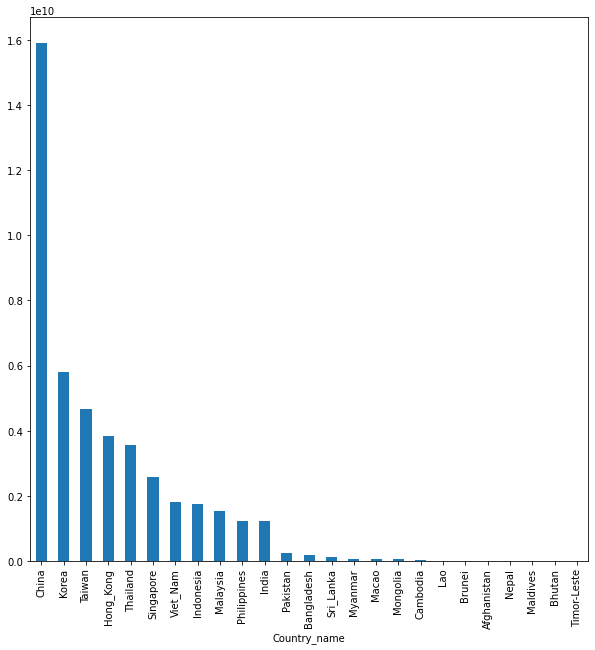

In [72]:
asia_plot.plot(kind = 'bar',x='Country_name',y='Value',figsize=(10,10)) 
#Bar graph of value of exports to asian countries

In [64]:
asia_imp = main_df[(main_df['Area']=='Asia') & (main_df['exp_imp']==2)] #asia import data

In [68]:
asia_imp_sumvalue = asia_imp.groupby(['Country_name'])['Value'].sum().sort_values(ascending = False)

<AxesSubplot:xlabel='Country_name'>

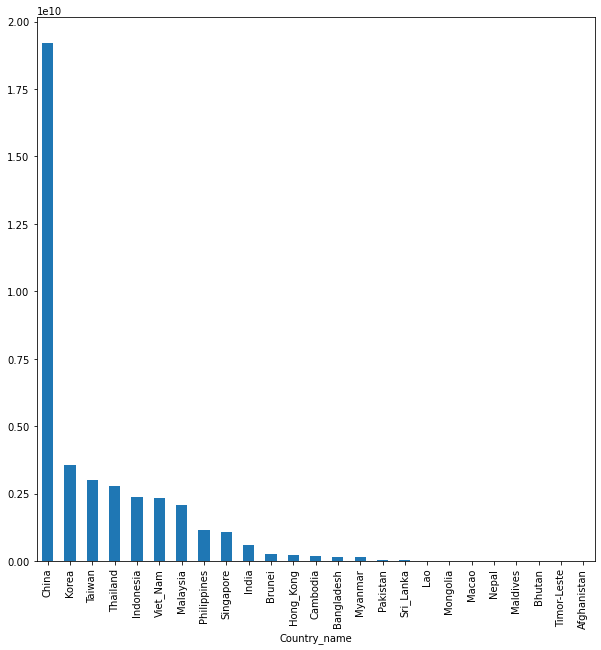

In [70]:
asia_imp_sumvalue.plot(kind='bar',figsize=(10,10)) 
#Bar graph of value of exports to asian countries

In [71]:
#Japan's both exports and imports are highest with China among the asian countries.

In [84]:
##TOP 10 COUNTRIES JAPAN EXPORTS THE HIGHEST IN TERMS OF VALUES

In [85]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       15897740448
United_States_of_America    15470237117
Korea                        5792562476
Taiwan                       4679208154
Hong_Kong                    3832339073
Thailand                     3562499224
Singapore                    2584088484
Germany                      2305586949
Australia                    1886229711
Viet_Nam                     1814163058
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

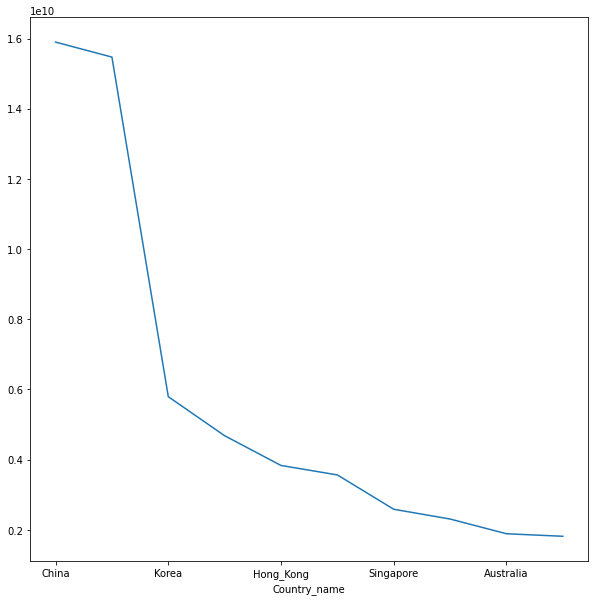

In [82]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot.line(figsize=(10,10))

<AxesSubplot:xlabel='Country_name'>

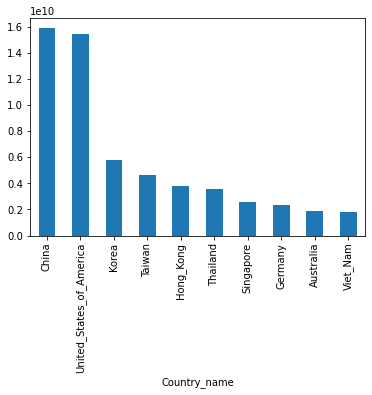

In [83]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

In [86]:
#cOUNTRIES WHERE JAPAN EXPORTS THE LOWEST (in terms of values)

In [90]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = True)[:10]

Country_name
Greenland_(Denmark)                          250
Falkland_Islands_and_Dependencies_(UK)      4288
West_Sahara                                 5962
St._Helena_Island_and_Dependencies_(UK)    10281
Guinea-Bissau                              13705
Tokelau_Islands_(NZ)                       15721
US_Virgin_Islands                          34401
Monstserrat_(UK)                           40119
Andorra                                    43804
Other_Australian_Territories               55999
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

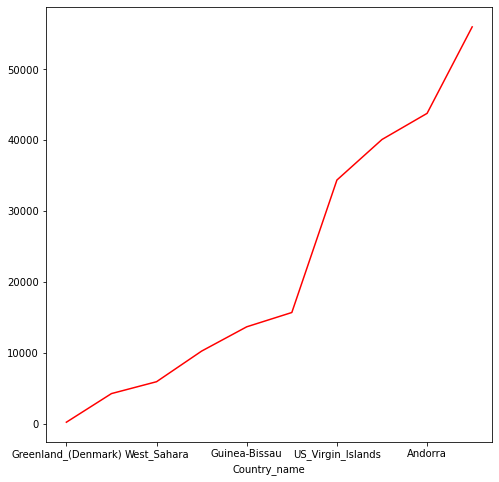

In [92]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = True)[:10].plot.line(color = 'Red',figsize=(8,8))

In [93]:
##TOP 10 COUNTRIES JAPAN IMPORTS THE HIGHEST IN TERMS OF VALUES

In [94]:
main_df[main_df['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       19193652551
United_States_of_America     9014901931
Australia                    5052789661
Saudi_Arabia                 3732948329
Korea                        3550463916
United_Arab_Emirates         3046282430
Taiwan                       2997513887
Germany                      2869298507
Thailand                     2770728419
Indonesia                    2378912202
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

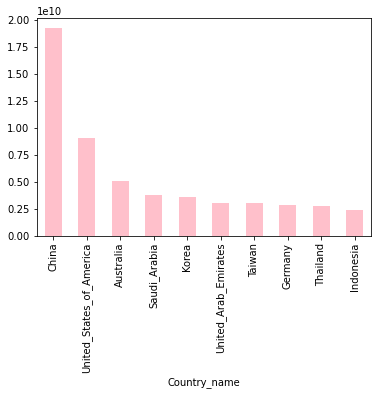

In [97]:
main_df[main_df['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar',color='Pink')

In [98]:
#COUNTRIES FROM WHERE JAPAN IMPORTS THE LOWEST (in terms of values)

In [99]:
main_df[main_df['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = True)[:10]

Country_name
British_Antarctic_Territory        525
Turks_and_Caicos_Islands_(UK)      565
British_Anguilla                   576
Northern_Mariana_Islands_(USA)     593
Antigua_and_Barbuda                683
American_Samoa                    1083
Grenada                           1181
Djibouti                          1249
Andorra                           1555
Canary_Islands_(Spain)            1732
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

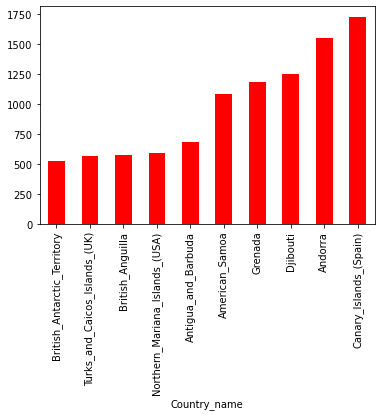

In [101]:
main_df[main_df['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = True)[:10].plot(kind = 'bar',color='Red')

In [19]:
hs2 = pd.read_csv(r'C:\Users\USER\Downloads\archive\Dataset\codes\hs2_eng.csv')

In [20]:
hs2.head(3)

,Unnamed: 0,hs2,hs2_name
0,0,1.0,Live animals.
1,1,2.0,Meat and edible meat offal.
2,2,3.0,Fish and crustaceans molluscs and other aquat...


In [22]:
ym_hs2 = pd.merge(main_df,hs2,on = ['hs2'])

In [23]:
ym_hs2.head()

,Unnamed: 0_x,Country,Country_name,Area,exp_imp,Year,month,Unit1,Unit2,Q1,Q2,Value,hs2,hs4,hs6,hs9,Unnamed: 0_y,hs2_name
0,0,103,Korea,Asia,1,2018,01,,NO,0,7979,24889,1.0,106,10619,10619000,0,Live animals.
1,0,103,Korea,Asia,2,2018,01,NO,KG,10752,282,2418,1.0,106,10619,10619090,0,Live animals.
2,0,103,Korea,Asia,2,2018,01,NO,KG,0,0,0,1.0,106,10620,10620031,0,Live animals.
3,0,103,Korea,Asia,1,2018,02,,NO,0,7359,21048,1.0,106,10619,10619000,0,Live animals.
4,0,103,Korea,Asia,2,2018,02,NO,KG,8064,226,1914,1.0,106,10619,10619090,0,Live animals.


In [24]:
ym_hs2_asia = ym_hs2[(ym_hs2['Area']=='Asia') & (ym_hs2['exp_imp'] ==1)]

In [25]:
hs2_asia_count = ym_hs2_asia['hs2_name'].value_counts()[:10]

<AxesSubplot:>

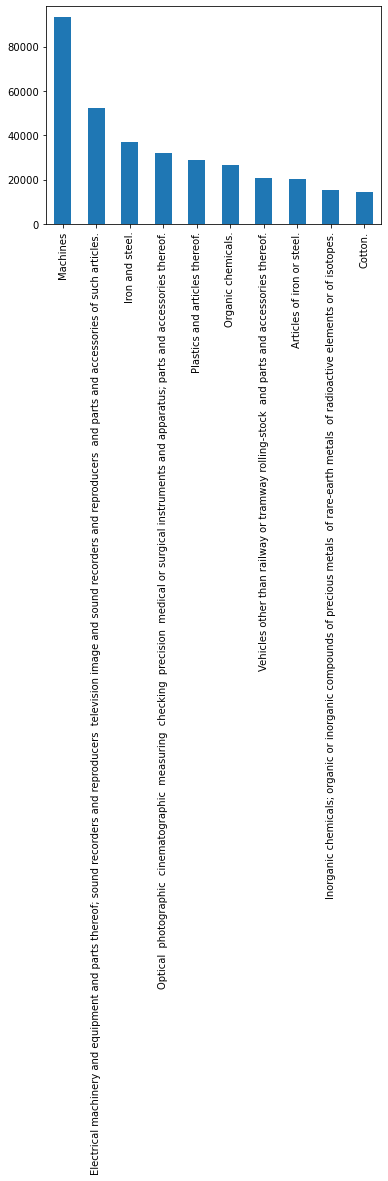

In [26]:
hs2_asia_count.plot(kind='bar') ##Top 10 hs2 product being exported to Asian countries

<AxesSubplot:>

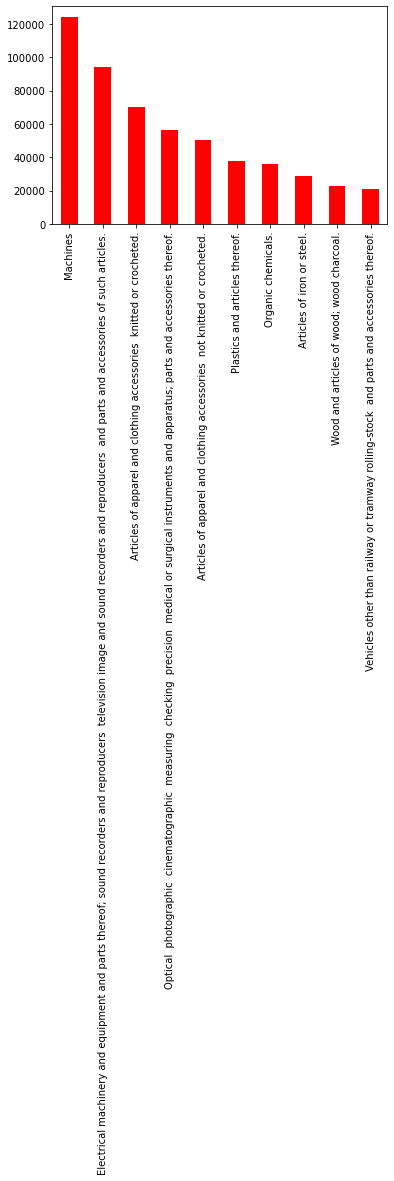

In [113]:
ym_hs2[ym_hs2['exp_imp'] ==2]['hs2_name'].value_counts()[:10].plot(kind = 'bar',color = 'Red') 
##TOP 10 hs2 imports (among all hs2 imports from all countries)

<AxesSubplot:>

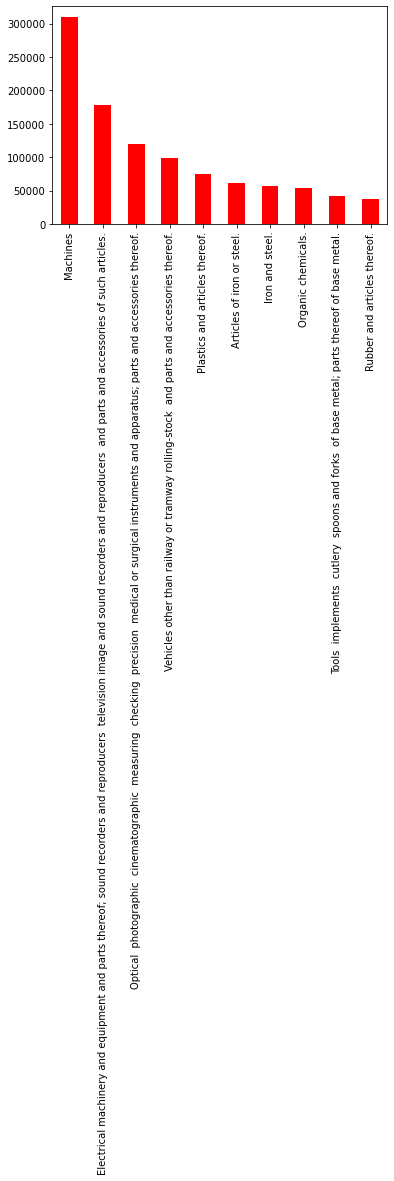

In [114]:
ym_hs2[ym_hs2['exp_imp'] ==1]['hs2_name'].value_counts()[:10].plot(kind = 'bar',color = 'Red') 
##TOP 10 hs2 exports (among all hs2 expots to all countries)

In [27]:
hs4 = pd.read_csv(r'C:\Users\USER\Downloads\archive\Dataset\codes\hs4_eng.csv')

In [28]:
hs4.head(2)

,Unnamed: 0,hs4,hs4_name
0,0,0,unknow
1,1,101,Live_horses__asses__mules_and_hinnies


In [29]:
ym_hs4 = pd.merge(main_df,hs4,on = ['hs4'])

In [30]:
ym_hs4_asia = ym_hs4[(ym_hs2['Area']=='Asia') & (ym_hs4['exp_imp'] ==1)]

In [31]:
hs4_asia_count = ym_hs4_asia['hs4_name'].value_counts()[:10]

<AxesSubplot:>

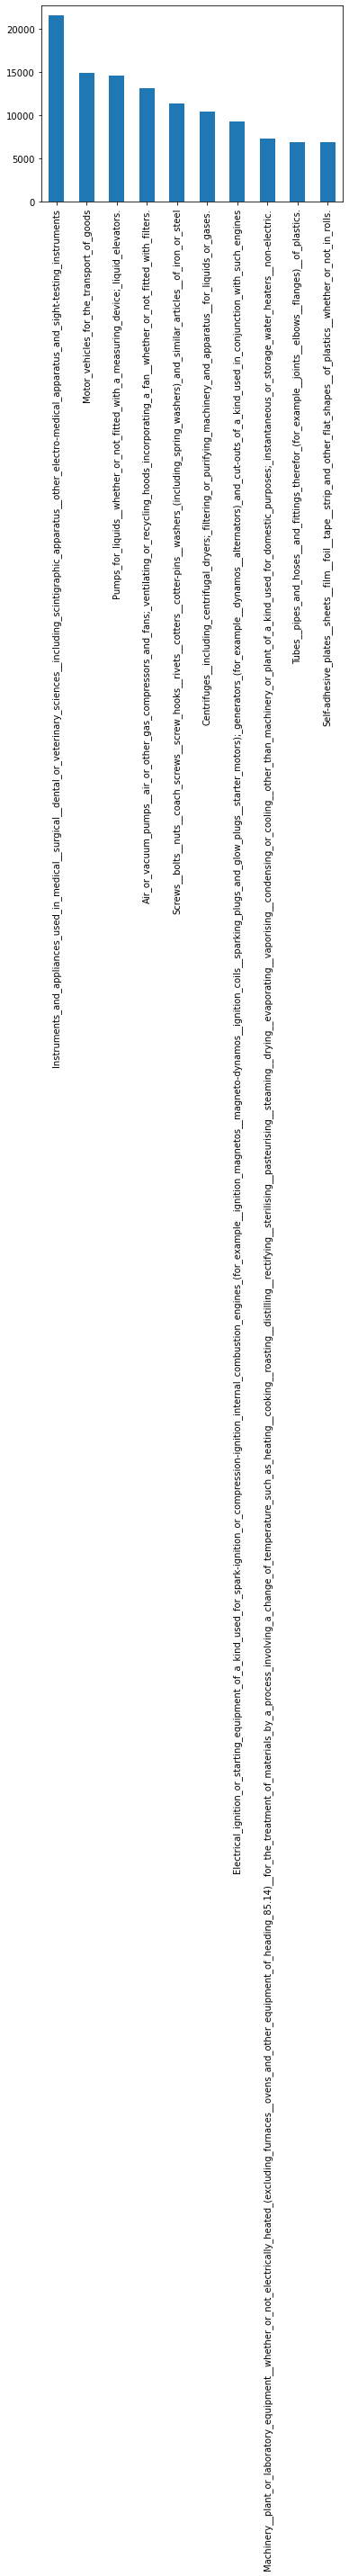

In [102]:
hs4_asia_count.plot(kind='bar') ##Top 10 hs4 product being exported to Asian countries

In [33]:
hs6 = pd.read_csv(r'C:\Users\USER\Downloads\archive\Dataset\codes\hs6_eng.csv')

In [34]:
hs9 = pd.read_csv(r'C:\Users\USER\Downloads\archive\Dataset\codes\hs9_eng.csv')

In [35]:
ym_hs6 = pd.merge(main_df,hs6,on = ['hs6'])

In [36]:
ym_hs6_asia = ym_hs6[(ym_hs6['Area']=='Asia') & (ym_hs6['exp_imp'] ==1)]

In [37]:
hs6_asia_count = ym_hs6_asia['hs6_name'].value_counts()[:10]

<AxesSubplot:>

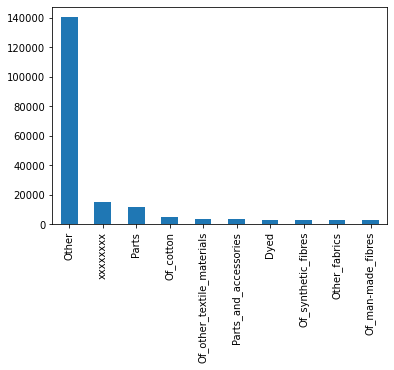

In [103]:
hs6_asia_count.plot(kind = 'bar') ###Top 10 hs6 product being exported to Asian countries

In [39]:
ym_hs9 = pd.merge(main_df,hs9,on = ['hs9'])

In [40]:
ym_hs9_asia = ym_hs9[(ym_hs9['Area']=='Asia') & (ym_hs9['exp_imp'] ==1)]

In [41]:
hs9_asia_count = ym_hs9_asia['hs9_name'].value_counts()[:10]

<AxesSubplot:>

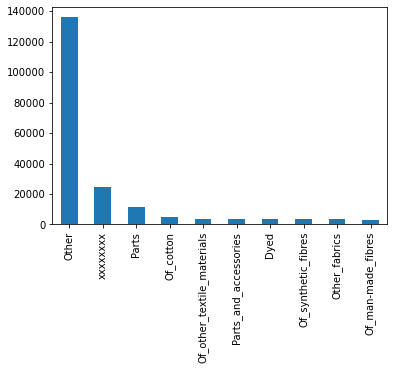

In [42]:
hs9_asia_count.plot(kind = 'bar')

In [44]:
q1_exp = main_df[main_df['exp_imp']==1].groupby('Country_name')['Q1'].sum().sort_values(ascending=True)

<AxesSubplot:xlabel='Country_name'>

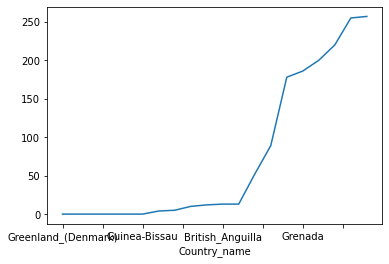

In [45]:
q1_exp[:20].plot.line() #line graph of Q1 sum(exports) over countries

<AxesSubplot:xlabel='Country_name'>

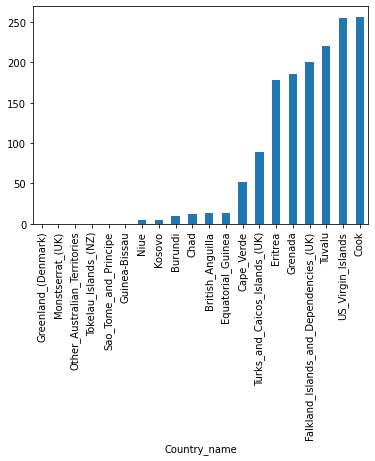

In [46]:
q1_exp[:20].plot(kind='bar')

In [47]:
q1_imp = main_df[main_df['exp_imp']==2].groupby('Country_name')['Q1'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Country_name'>

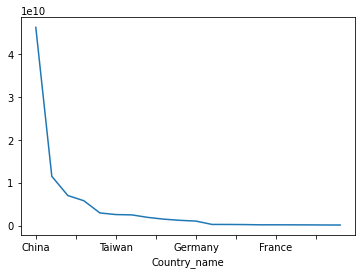

In [115]:
q1_imp[:20].plot.line() #line graph of Q1 sum(imports) over countries

<AxesSubplot:xlabel='Country_name'>

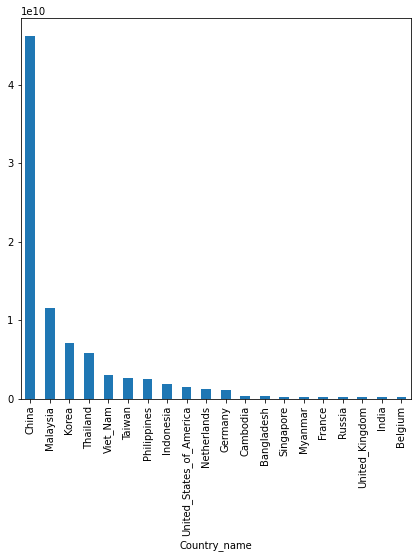

In [49]:
q1_imp[:20].plot(kind = 'bar',figsize=(7,7))  #bar plot - Q1 sum(exports) over countries

In [50]:
q2_exp = main_df[main_df['exp_imp']==1].groupby('Country_name')['Q2'].sum().sort_values(ascending=True)

<AxesSubplot:xlabel='Country_name'>

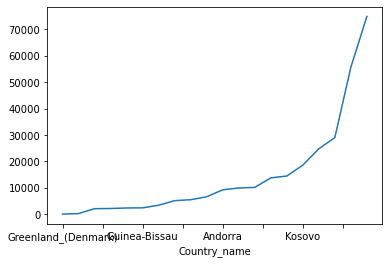

In [116]:
q2_exp[:20].plot.line() #line plot - Q2 sum(exports) over countries

<AxesSubplot:xlabel='Country_name'>

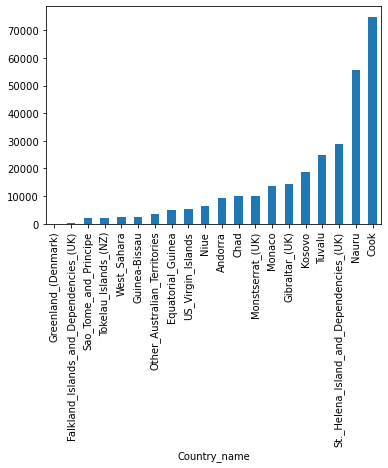

In [117]:
q2_exp[:20].plot(kind = 'bar') #bar plot - Q2 sum(exports) over countries

In [53]:
q2_imp = main_df[main_df['exp_imp']==2].groupby('Country_name')['Q2'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Country_name'>

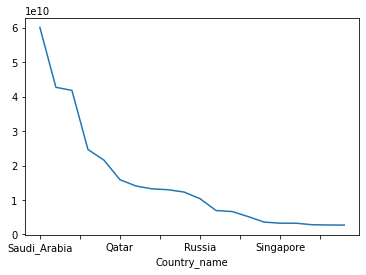

In [118]:
q2_imp[:20].plot.line() #line plot - Q1 sum(imports) over countries

<AxesSubplot:xlabel='Country_name'>

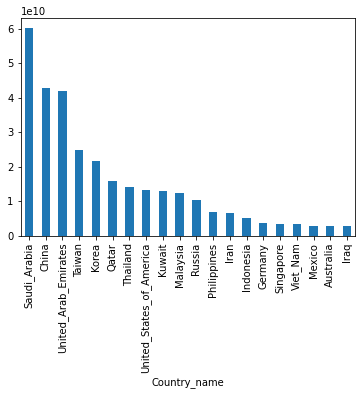

In [119]:
q2_imp[:20].plot(kind = 'bar') #bar plot - Q1 sum(imports) over countries

<AxesSubplot:xlabel='Q1', ylabel='Value'>

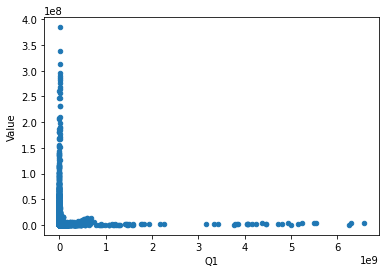

In [56]:
main_df.plot.scatter(x='Q1',y='Value')

<AxesSubplot:xlabel='Q2', ylabel='Value'>

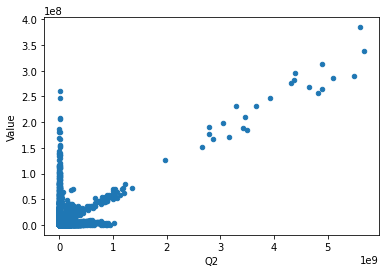

In [57]:
main_df.plot.scatter(x='Q2',y='Value')

<AxesSubplot:xlabel='Q1', ylabel='Q2'>

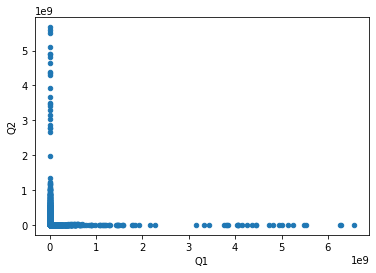

In [58]:
main_df.plot.scatter(x='Q1',y='Q2')

<AxesSubplot:ylabel='Area'>

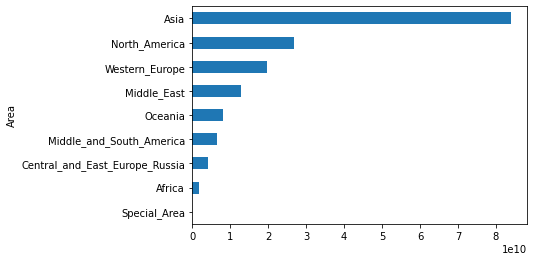

In [121]:
main_df.groupby('Area')['Value'].sum().sort_values(ascending = True).plot(kind = 'barh') #Import-Exports value (every region)

<AxesSubplot:xlabel='month'>

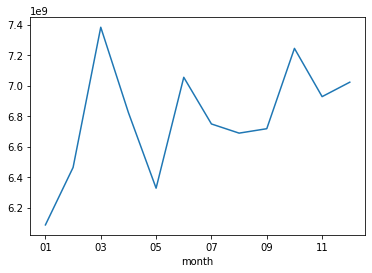

In [122]:
main_df[main_df['exp_imp']==1].groupby('month')['Value'].sum().plot.line('month','Value') #Line plot of export value over time (month)

<AxesSubplot:xlabel='month'>

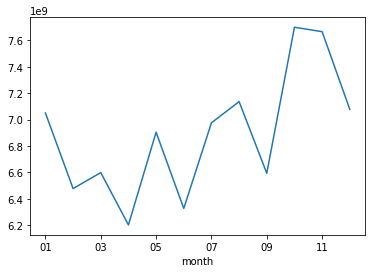

In [123]:
main_df[main_df['exp_imp']==2].groupby('month')['Value'].sum().plot.line('month','Value') #Line plot of import value over time (month)